In [11]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
df=pd.read_csv(os.path.join('datasets','bbc_text_cls.csv'))

In [3]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [29]:
df.shape

(2225, 2)

In [22]:
df['labels'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [56]:
import matplotlib.pyplot as plt

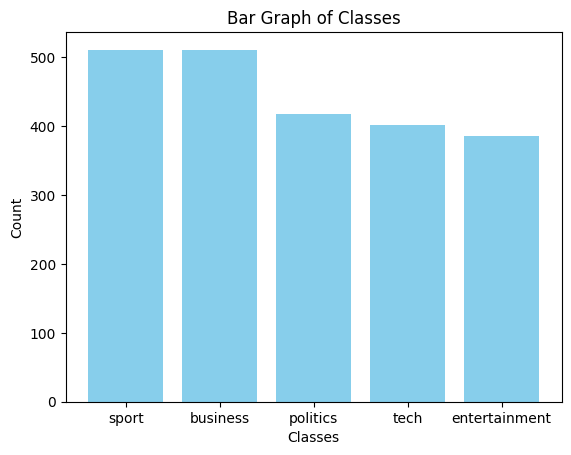

In [58]:
class_counts = df['labels'].value_counts()
plt.bar(class_counts.index, class_counts.values, color='skyblue')

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Bar Graph of Classes')

# Show the plot
plt.show()

In [7]:
text=df['text'].values

In [9]:
text[0]

'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [86]:
df=df.sample(frac=1).reset_index(drop=True)

In [87]:
df.head()

,text,labels
0,Blair buys copies of new Band Aid\n\nPrime Min...,entertainment
1,Stern dropped from radio stations\n\nControver...,entertainment
2,Novartis hits acquisition trail\n\nSwiss drugm...,business
3,South African car demand surges\n\nCar manufac...,business
4,Music mogul Fuller sells company\n\nPop Idol s...,entertainment


In [88]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [240]:
df['targets']=df['labels'].astype("category").cat.codes

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [265]:
MAX_FEATURES=200000

In [264]:
tokenizer=Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(df_train['text'])
sequences_train=tokenizer.texts_to_sequences(df_train['text'])
sequences_test=tokenizer.texts_to_sequences(df_test['text'])

In [263]:
word2idx=tokenizer.word_index
V=len(word2idx)
V

32359

In [245]:
data_train=pad_sequences(sequences_train)
data_train.shape[1]

4440

In [247]:
data_test=pad_sequences(sequences_test, maxlen=data_train.shape[1])

In [197]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D,Dense,GlobalMaxPooling1D,Embedding,Input,LSTM,Bidirectional

In [257]:
i=Input(shape=(data_train.shape[1],))
e=Embedding(vocab_size+1,32)(i)
l1=Conv1D(64,5,activation='relu')(e)
l2=GlobalMaxPooling1D()(l1)

output=Dense(5)(l2)
model=Model(i,output)

In [259]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [260]:
model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_38 (InputLayer)       [(None, 4440)]            0         
                                                                 
 embedding_36 (Embedding)    (None, 4440, 32)          1035520   
                                                                 
 conv1d_29 (Conv1D)          (None, 4436, 64)          10304     
                                                                 
 global_max_pooling1d_31 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_50 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1,046,149
Trainable params: 1,046,149
Non-trainable params: 0
________________________________________________

In [261]:
# history=model.fit(train,epochs=50,validation_data=val)
history=model.fit(data_train,df_train['targets'],epochs=15,validation_data=[data_test,df_test['targets']])

Epoch 1/15
49/49 [==============================] - 28s 551ms/step - loss: 1.5958 - accuracy: 0.2749 - val_loss: 1.5565 - val_accuracy: 0.3608
Epoch 2/15
49/49 [==============================] - 24s 488ms/step - loss: 1.4739 - accuracy: 0.6975 - val_loss: 1.4094 - val_accuracy: 0.8488
Epoch 3/15
49/49 [==============================] - 25s 502ms/step - loss: 1.1490 - accuracy: 0.9107 - val_loss: 0.9466 - val_accuracy: 0.8817
Epoch 4/15
49/49 [==============================] - 24s 494ms/step - loss: 0.6336 - accuracy: 0.9216 - val_loss: 0.5126 - val_accuracy: 0.9012
Epoch 5/15
49/49 [==============================] - 24s 480ms/step - loss: 0.3097 - accuracy: 0.9557 - val_loss: 0.3341 - val_accuracy: 0.9296
Epoch 6/15
49/49 [==============================] - 23s 468ms/step - loss: 0.1637 - accuracy: 0.9801 - val_loss: 0.2619 - val_accuracy: 0.9356
Epoch 7/15
49/49 [==============================] - 23s 462ms/step - loss: 0.0943 - accuracy: 0.9910 - val_loss: 0.2238 - val_accuracy: 0.9431

In [262]:
model.save('./saved_models/TextClassification.h5')

<Figure size 800x500 with 0 Axes>

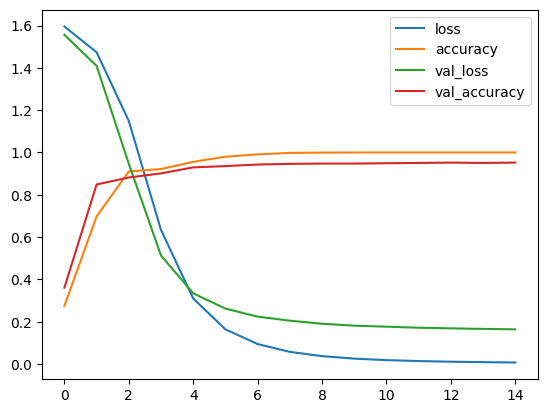

In [266]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()